In [165]:
import lmdb
import caffe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    

In [124]:
def edit_prototxt(net,key_list):
    """
    :param replacement_dict: {'training_data': , 'training_labels': ,
                              'testing_data': , 'testing_labels': }
    :return:
    """
    sources = []
    with open(net) as netfile:
        for line in netfile:
            for key in key_list:
                if key in line:
                    sources.append(line.strip().replace(key, '').strip("\""))
    return sources

def plot_lmdb_sample(net, n_samples,title):


    lmdb_env = lmdb.open(net)
    lmdb_txn = lmdb_env.begin()
    lmdb_cursor = lmdb_txn.cursor()
    datum_db = caffe.proto.caffe_pb2.Datum()
    #print(lmdb_env.stat())
    I = []
    Label = []
    im_count = 0
    plt.figure()
    plt.suptitle(title)
    for key, value in lmdb_cursor:
            datum_db.ParseFromString(value)
            label = datum_db.label
            data = caffe.io.datum_to_array(datum_db)
            im = data.astype(np.uint8)
            im = np.transpose(im, (2, 1, 0)) # original (dim, col, row)\
            plt.subplot(1, n_samples, im_count)
            plt.imshow(im.squeeze())
            if im_count == n_samples:
                break
            im_count = im_count + 1
            
    plt.show()

Rotated


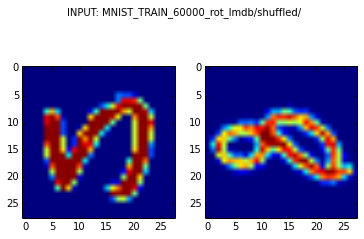

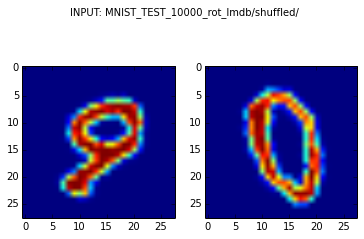

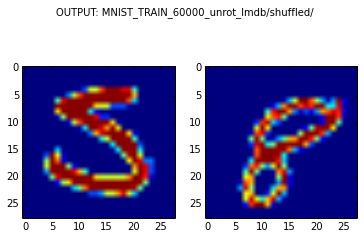

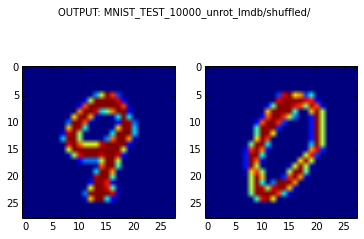

Unrotated


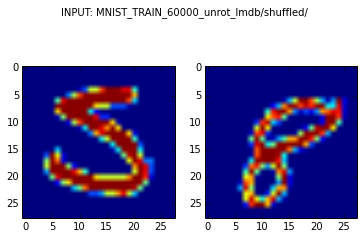

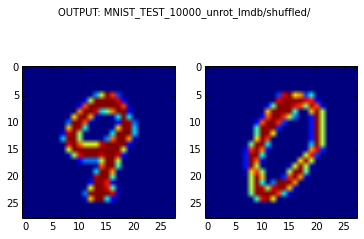

Noisy Rotated 25%


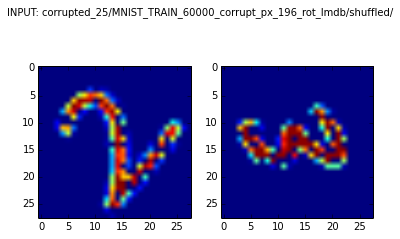

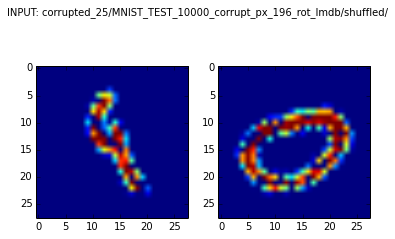

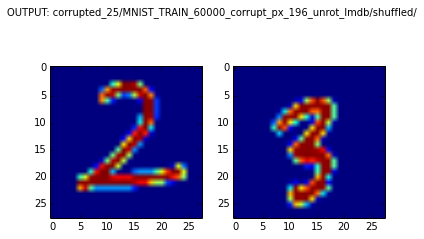

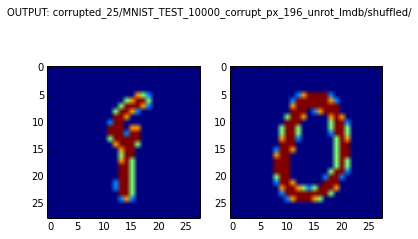

Noisy Unrotated 25%


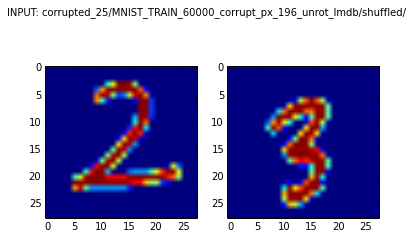

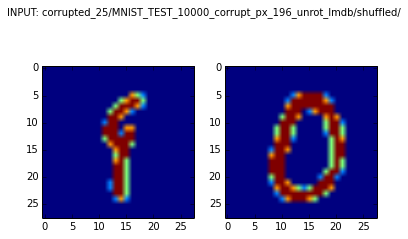

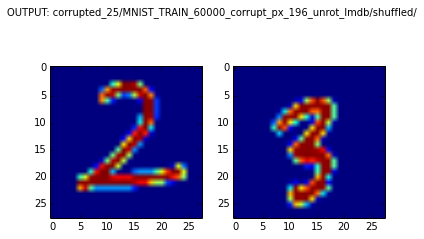

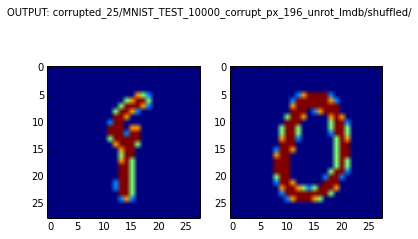

Noisy Rotated 50%


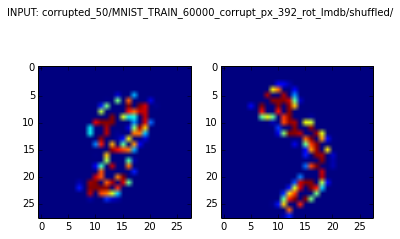

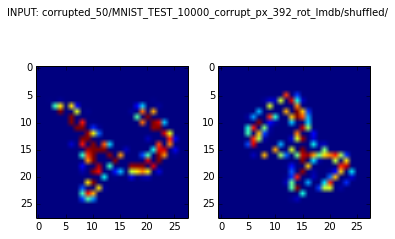

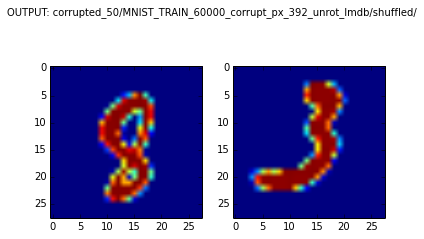

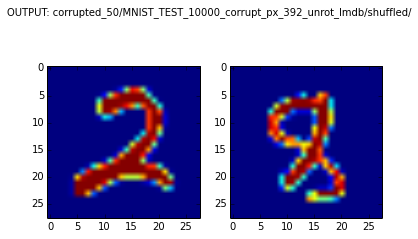

In [125]:
nets = ['/mnt/antares_raid/home/oliver/Experiments/R/net.prototxt',
        '/mnt/antares_raid/home/oliver/Experiments/UR/net.prototxt',
        '/mnt/antares_raid/home/oliver/Experiments/N25R/net.prototxt',
        '/mnt/antares_raid/home/oliver/Experiments/N25NUR/net.prototxt',
        '/mnt/antares_raid/home/oliver/Experiments/N50R/net.prototxt',
        '/mnt/antares_raid/home/oliver/Experiments/N50NUR/net.prototxt'
        ]
labels = ["Rotated", 'Unrotated', 'Noisy Rotated 25%', 'Noisy Unrotated 25%','Noisy Rotated 50%' ]#, 'Noisy Unrotated 50%%', ]                   

key_list = ["source: "]

for label, net in zip(labels,nets):
    print(label)
    sources = edit_prototxt(net,key_list)
    #print(sources)
    for i,s in enumerate(sources):
        if len(sources) ==2:
            if i ==0:
                plot_lmdb_sample(s, 2, "INPUT: " + '/'.join(s.split("/")[7:]))
            if i==1:
                plot_lmdb_sample(s, 2, "OUTPUT: " + '/'.join(s.split("/")[7:]))
                
        if len(sources) ==4:
            if i == 0 or i == 1:
                plot_lmdb_sample(s, 2, "INPUT: " + '/'.join(s.split("/")[7:]))
            if i == 2 or i == 3:
                plot_lmdb_sample(s, 2, "OUTPUT: " + '/'.join(s.split("/")[7:]))
            
        
    
    

In [104]:
'/mnt/antares_raid/home/oliver/Experiments/lmdbs/MNIST_TRAIN_60000_rot_lmdb/shuffled/'.split("/")[7]

'MNIST_TRAIN_60000_rot_lmdb'

In [166]:
A = list(range(780000))
def bla(a,*params):
    if params:
        import json
        with open(params[0]) as data_file:    
            ind = json.load(data_file)
            print(ind[:10])
            print(np.array(A)[[ind[:10]]])
    else:
        print(a)

In [167]:
bla(5, '/mnt/antares_raid/home/oliver/Experiments/lmdbs/corrupted_25/MNIST_TRAIN_60000_corrupt_px_196_rot_lmdb/shuffled/indices_list.txt')


[u'0000721091', u'0000097074', u'0000685632', u'0000142820', u'0000247035', u'0000370233', u'0000385173', u'0000278091', u'0000174033', u'0000413644']
[721091  97074 685632 142820 247035 370233 385173 278091 174033 413644]


In [156]:
A = list(range(780000))
print(np.array(A)[[1,2,3]])

[1 2 3]


In [176]:
import json
with open('/mnt/antares_raid/home/oliver/Experiments/lmdbs/corrupted_25/MNIST_TRAIN_60000_corrupt_px_196_rot_lmdb/shuffled/indices_list.txt') as data_file:    
    ind = json.load(data_file)
ind = [int(i) for i in ind]

In [177]:
ind[:5]

[721091, 97074, 685632, 142820, 247035]